In [1]:
%pylab inline
#import numpy as np
import pandas as pd
#import matplotlib
#import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import random
from astropy.time import Time
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [4]:
# 1 year of data
df = pd.read_csv('ic-singlet-jan16.csv')
print len(df)

16656


In [15]:
df.head(5)

,ICDec,ICRA,ICsigmaR,ICtime,ICmsec
0,-34.7199,205.1050,0.196344,2016-01-01 00:04:57,98664
1,54.3056,107.9430,0.534230,2016-01-01 00:05:40,122278
2,57.3919,108.1390,1.176690,2016-01-01 00:05:48,730722
3,-32.6259,332.9440,0.175290,2016-01-01 00:06:08,981306
4,22.6634,20.1443,2.750110,2016-01-01 00:15:24,288569


In [16]:
# scramble IceCube data
for i in range(1):
    df2 = df.reindex(np.random.permutation(df.index))
    df2.reset_index(drop=True, inplace=True)
    df2[['ICDec','ICsigmaR']] = df[['ICDec','ICsigmaR']]
    df2.columns=['ICDec','ICRA','ICsigmaR','ICtime','ICmsec']
    df2.to_csv("IC-Jan16-energy-scrambled{}.csv".format(i),index=False,encoding='utf-8')

In [17]:
df2.head(5)

,ICDec,ICRA,ICsigmaR,ICtime,ICmsec
0,-34.7199,195.1500,0.196344,2016-01-01 21:31:05,137476
1,54.3056,227.8000,0.534230,2016-01-23 18:44:09,377443
2,57.3919,122.4520,1.176690,2016-01-08 18:51:15,812830
3,-32.6259,42.3355,0.175290,2016-01-04 08:39:25,247456
4,22.6634,319.0150,2.750110,2016-01-14 11:09:50,120220


In [18]:
#file with no energy
for i in range(1000,1001):
    df2 = df.reindex(np.random.permutation(df.index))
    df2.reset_index(drop=True, inplace=True)
    df2[['ICDec','ICsigmaR']] = df[['ICDec','ICsigmaR']]
    df2.columns=['ICDec','ICRA','ICsigmaR','ICtime','ICmsec']
    df2.to_csv("IC_scrambled/{}.csv".format(i),
          index=False,encoding='utf-8')

In [19]:
#Scrambling HAWC
df=pd.read_csv("hawc_data_2.csv",delimiter=",")
df['HTime_c']=pd.to_datetime(df['HTime_c'])
df = df.sort_values(by='HTime_c')

In [20]:
df.head(5)

,HDec,HRA,HsigmaR,HTime_i,HTime_c,HTime_f,Hduration,Hsig
1,-8.423330,256.377,0.75,2016-01-01 14:03:17,2016-01-01 16:52:28,2016-01-01 19:41:39,5.63943,2.85261
27,-19.431800,258.047,0.75,2016-01-01 14:49:10,2016-01-01 16:59:13,2016-01-01 19:09:16,4.33481,3.08562
14,-12.673900,258.487,0.75,2016-01-01 14:24:19,2016-01-01 17:00:55,2016-01-01 19:37:31,5.22007,2.95240
7,-8.159460,258.882,0.75,2016-01-01 14:12:34,2016-01-01 17:02:28,2016-01-01 19:52:22,5.66324,3.24719
3,-0.708832,261.123,0.75,2016-01-01 14:04:34,2016-01-01 17:11:22,2016-01-01 20:18:10,6.22688,3.03762


In [21]:
for i in range(0,1200):
    df2 = df.reindex(np.random.permutation(df.index))
    df2.reset_index(drop=True, inplace=True)
    df2[['HDec','Hduration']] = df[['HDec','Hduration']]
    df2[['HTime_i']] = pd.to_datetime(df2.HTime_c)-pd.to_timedelta(df2.Hduration/2, unit='h')
    df2[['HTime_f']] = pd.to_datetime(df2.HTime_c)+pd.to_timedelta(df2.Hduration/2, unit='h')
    df2.columns=['HDec','HRA','HsigmaR','HTime_i','HTime_c','HTime_f','Hduration','Hsig']
    df2.to_csv("HAWC_scrambled/{}.csv".format(i),
          index=False,encoding='utf-8')

## New IC data with FPRD and Sigs

In [27]:
data = np.load('2015singlets_data_burn_3339043sec_forHAWCcoincs.npz')
data.files

['cr_err', 'sigs', 'ra', 'dec', 'fprd', 'mjds']

In [28]:
values = []
names = ['ICsigmaR','ICsigs','ICRA','ICDec','ICFPRD','ICtime','ICmsec']
for item in data.iteritems():
    values.append(item[1])

In [29]:
values=np.asarray(values).T.tolist()

In [30]:
for item in values:
    t = Time(stats.uniform.rvs(loc=57388.0,scale=38.6,size=1)[0],format='mjd')
    t.format = 'iso'
    item[5] = t.value[0:19]
    item.append(t.value[20:])

In [31]:
df = pd.DataFrame.from_records(values,columns=names)

In [32]:
df['ICRA'] = np.rad2deg(df['ICRA'])
df['ICDec'] = np.rad2deg(df['ICDec'])
df['ICsigmaR'] = np.rad2deg(df['ICsigmaR'])

In [33]:
df.columns = ['ICsigmaR','ICsigs','ICRA','ICDec','ICFPRD','ICtime','ICmsec']# ['ICDec','ICRA','ICsigmaR','ICtime','ICmsec','ICFPRD','ICsigs']
df = df[['ICDec','ICRA','ICsigmaR','ICtime','ICmsec','ICFPRD','ICsigs']]


In [35]:
for i in range(0,1200):
    df2 = df.reindex(np.random.permutation(df.index))
    df2.reset_index(drop=True, inplace=True)
    df2[['ICDec','ICsigmaR']] = df[['ICDec','ICsigmaR']]
    df2.columns=['ICDec','ICRA','ICsigmaR','ICtime','ICmsec','ICFPRD','ICsigs']
    df2.to_csv("IC_scrambled2/{}.csv".format(i),
          index=False,encoding='utf-8')

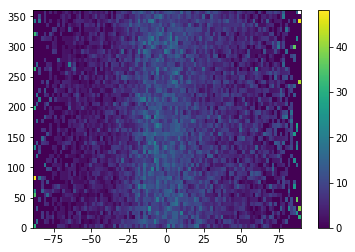

In [55]:
hist2d(df.ICDec,df.ICRA,bins=[100,50],weights=(1./np.cos(np.deg2rad(df.ICDec))),cmax=50)
colorbar()

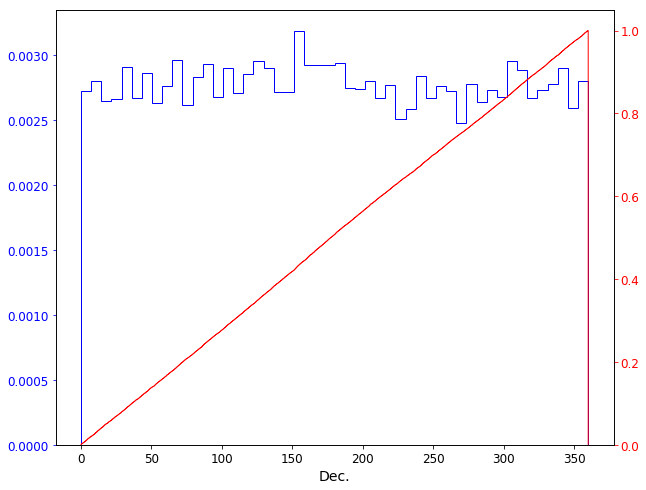

In [56]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12
fig, ax1 = plt.subplots()
l=ax1.hist(df.ICRA,bins=50,histtype='step',normed=True,color='blue')
ax1.set_xlabel('Dec.',size=14)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
d=ax2.hist(df.ICRA,bins=1000,histtype='step',normed=True,cumulative=True,color='red')
ax2.tick_params('y', colors='r')

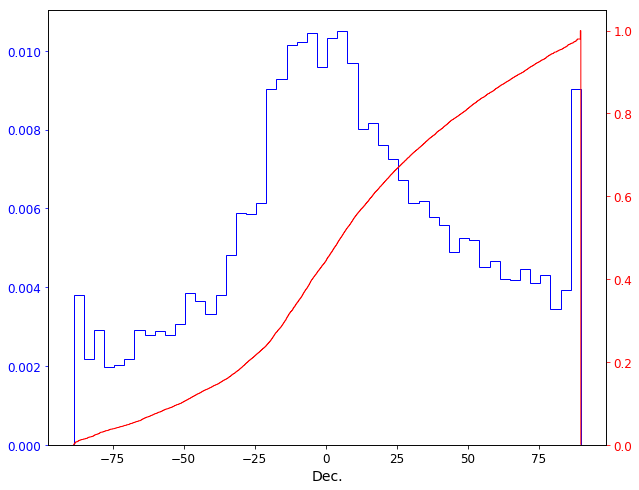

In [61]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12
fig, ax1 = plt.subplots()
l=ax1.hist(df.ICDec,bins=50,histtype='step',normed=True,color='blue',weights=1./np.cos(np.deg2rad(df.ICDec)))
ax1.set_xlabel('Dec.',size=14)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
d=ax2.hist(df.ICDec,bins=1000,histtype='step',normed=True,cumulative=True,color='red',weights=1./np.cos(np.deg2rad(df.ICDec)))
ax2.tick_params('y', colors='r')

In [63]:
len(df)/3339043.

0.006688742852368179

In [65]:
len(df2)

22334